In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('input/Titanic.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
# lets check the Missing Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# lets Impute the Missing Values
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.isnull().sum().sum()

0

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


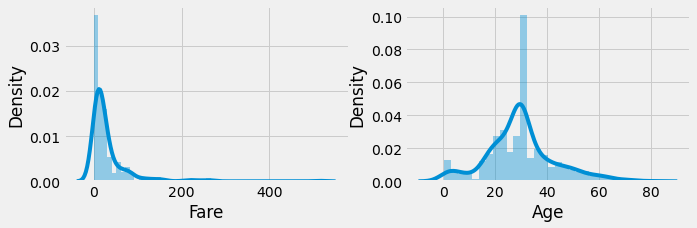

In [4]:
# lets Check the Distribution of Age and Fare

plt.rcParams['figure.figsize'] = (10, 3)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.distplot(data['Fare'])

plt.subplot(1, 2, 2)
sns.distplot(data['Age'])
plt.show()

In [5]:
# lets Bin the Fare, 
def fare_cat(x):
    if x < 100:
        return "Cheap"
    else:
        return "Expensive"
    
# lets Apply this Function
data['Fare'] = data['Fare'].apply(fare_cat)
# lets check the values
data['Fare'].value_counts()

Cheap        838
Expensive     53
Name: Fare, dtype: int64

In [6]:
# lets Create Bins for Ages Also
def age_cat(x):
    if x < 12:
        return 'Kids'
    elif x >= 12 and x < 18:
        return 'Grown Ups'
    elif x >= 18 and x < 35:
        return 'Adults'
    elif x > 35:
        return 'Old'

# lets apply this Function
data['Age'] = data['Age'].apply(age_cat)

# lets check the Values
data['Age'].value_counts()

Adults       543
Old          217
Kids          68
Grown Ups     45
Name: Age, dtype: int64

In [7]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [8]:
# lets Bin the Family Size also

def fam_cat(x):
    if x == 1:
        return 'Alone'
    elif x > 1 and x <= 4:
        return 'Small Family'
    else:
        return 'Large Family'
    
# lets apply the Function
data['FamilySize'] = data['FamilySize'].apply(fam_cat)

# lets check the Values
data['FamilySize'].value_counts()

Alone           537
Small Family    292
Large Family     62
Name: FamilySize, dtype: int64

In [9]:
# lets Extract the Information of Marraige from the Names of the Passengers

data['Title'] = data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

data['Title'] = data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 
                                          'Miss/Mrs/Ms')
data['Title'] = data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'],
                                          'Dr/Military/Noble/Clergy')

# lets Check the Values again
data['Title'].value_counts()

Mr                          517
Miss/Mrs/Ms                 313
Master                       40
Dr/Military/Noble/Clergy     21
Name: Title, dtype: int64

## milliams

In [10]:
import pandas as pd
import seaborn as sns
titanic = pd.read_csv("https://milliams.com/courses/data_analysis_python/titanic.csv")
titanic

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,NaN,NaN,yes
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,NaN,NaN,yes
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,NaN,NaN,no
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,NaN,NaN,no


In [11]:
#Find the average age of all people on board
titanic["age"].mean()

30.436734693877504

In [12]:
#Use a filter to select only the males
all_males = titanic[titanic["gender"] == "male"]

In [13]:
#Find the average age of the males on board
all_males["age"].mean()

30.83231351981346

In [14]:
#Select on the people in 3rd class
titanic[titanic["class"] == "3rd"]

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
1313,"Yūsuf, Mrs. Kātrīn",female,23.0,3rd,C,Lebanon,2668.0,22.0702,0.0,2.0,yes
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0.0,0.0,no
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0.0,0.0,no
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,0.0,0.0,yes


In [15]:
# Select just the passengers
# The technique shown in class was to combine together multiple selectors with |:

passengers = titanic[
    (titanic["class"] == "1st") | 
    (titanic["class"] == "2nd") | 
    (titanic["class"] == "3rd")
]
passengers = titanic[titanic["class"].isin(["1st", "2nd", "3rd"])]
passengers

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0.0,0.0,no
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0.0,0.0,no
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0.0,0.0,no
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,0.0,0.0,yes


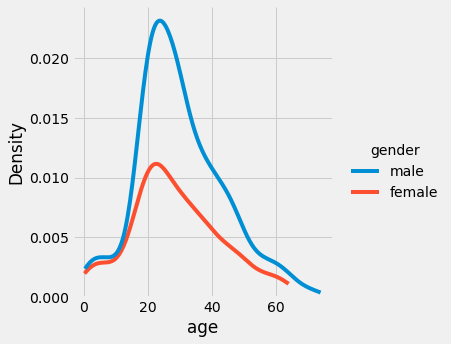

In [16]:
#Plot the distribution of ages for males and females
sns.displot(
    data=passengers,
    x="age",
    hue="gender",
    kind="kde",
    cut=0
)

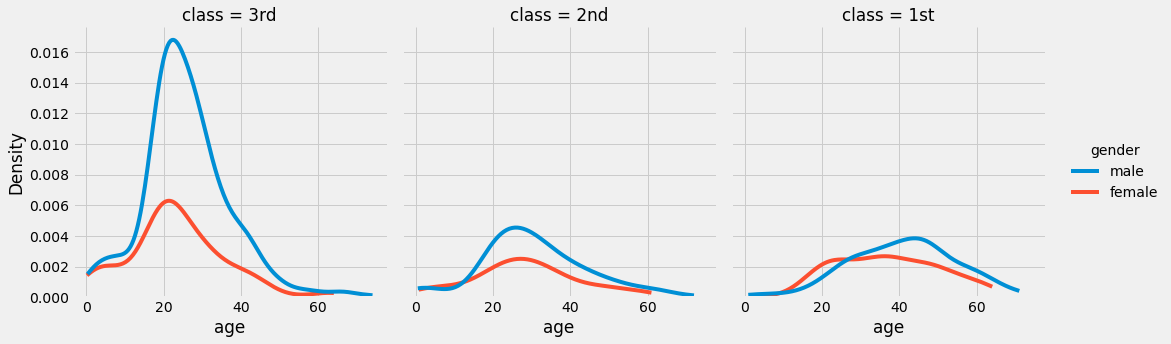

In [17]:
# All that has changed from the last plot is adding in the split by class over multiple columns:
sns.displot(
    data=passengers,
    x="age",
    hue="gender",
    kind="kde",
    cut=0,
    col="class",
    col_order=["1st", "2nd", "3rd"]
)

In [18]:
# Combining
# To reduce the duplication of effort here, I create a function which, given a set of data, calculated the survived fraction within. This is then called three times, once for each class:

def survived_ratio(df):
    yes = df[df["survived"] == "yes"]
    return len(yes) / len(df)

ratio_1st = survived_ratio(passengers[passengers["class"] == "1st"])
ratio_2nd = survived_ratio(passengers[passengers["class"] == "2nd"])
ratio_3rd = survived_ratio(passengers[passengers["class"] == "3rd"])

print(ratio_1st, ratio_2nd, ratio_3rd)

0.6203703703703703 0.4154929577464789 0.2552891396332863
